In [112]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import os

In [39]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

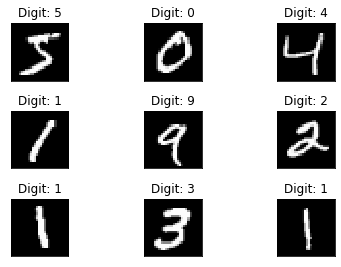

In [40]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [41]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)

X_train: (60000, 784)
X_test: (10000, 784)


In [42]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [45]:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.2487 - accuracy: 0.9262 - val_loss: 0.1020 - val_accuracy: 0.9669
Epoch 2/20
 - 5s - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.0745 - val_accuracy: 0.9758
Epoch 3/20
 - 6s - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 4/20
 - 6s - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.0652 - val_accuracy: 0.9788
Epoch 5/20
 - 7s - loss: 0.0464 - accuracy: 0.9849 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 6/20
 - 7s - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0702 - val_accuracy: 0.9782
Epoch 7/20
 - 7s - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0640 - val_accuracy: 0.9798
Epoch 8/20
 - 8s - loss: 0.0278 - accuracy: 0.9911 - val_loss: 0.0693 - val_accuracy: 0.9812
Epoch 9/20
 - 7s - loss: 0.0278 - accuracy: 0.9906 - val_loss: 0.0753 - val_accuracy: 0.9802
Epoch 10/20
 - 7s - loss: 0.0265 - accuracy: 0.9909 - val_loss: 0.0700 - val_accuracy: 0.9824
Epoch 11/20
 - 7s -

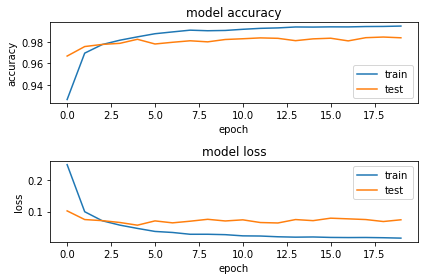

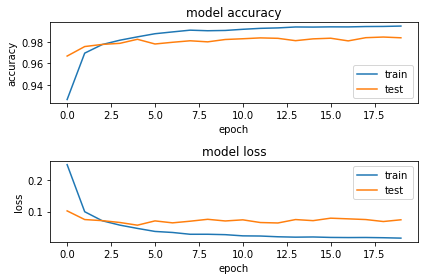

In [113]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [114]:
save_dir = r"C:\Users\Avinash\Desktop\MNIST DL"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\Avinash\Desktop\MNIST DL\keras_mnist.h5 


In [115]:
mnist_model = load_model(r"C:\Users\Avinash\Desktop\MNIST DL/keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(x_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07374986201301914
Test Accuracy 0.984000027179718



9840  classified correctly
160  classified incorrectly


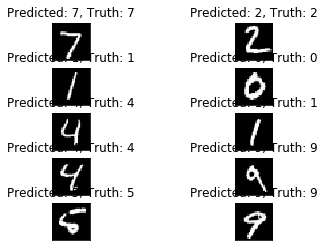

In [108]:
mnist_model = load_model(r"C:\Users\Avinash\Desktop\MNIST DL/keras_mnist.h5")
predicted_classes = mnist_model.predict_classes(x_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
#print(correct_indices)
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")
for i, correct in enumerate(correct_indices[:10]):
    plt.subplot(5,2,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])



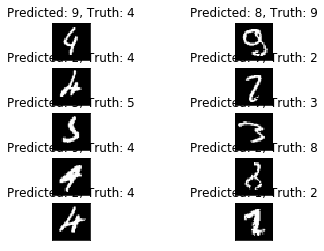

In [111]:
   
for i, incorrect in enumerate(incorrect_indices[:10]):
    plt.subplot(5,2,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[incorrect],
                                        y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])